In [65]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier


import tensorflow as tf
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier 

In [56]:
xls = pd.ExcelFile('Final_Data_PPE_v2_fz1.xlsx')

df1 = pd.read_excel(xls, 'Bridge_A')

In [57]:
# Current Ductility Demand is calculated by Rot100CDR / delta_y
df1['Collapse'] = (df1['Ductility Demand'] > 4).astype(int)
df1.head()

,Bridge_No,Record Sequence Number,5-95% Duration (sec),Earthquake Name,Year,Station Name,Magnitude,Mechanism,Rjb (km),Rrup (km),...,delta_y,Ry,Ductility,Period,Vy/W,Rot50CDR,Rot100CDR,Ductility Demand,DI,Collapse
0,1,18553,11.8,"""21273463""",2003,"""Bear Gulch Road""",3.3,Normal Oblique,51.36,51.84,...,0.009604,1.217737e-06,3.553846,1.079948,0.041191,0.000013,0.000016,0.001671,-0.390912,0
1,1,18554,13.6,"""21273463""",2003,"""Black Mountain Los Altos""",3.3,Normal Oblique,35.90,36.58,...,0.009604,6.290907e-07,3.553846,1.079948,0.041191,0.000006,0.000009,0.000910,-0.391210,0
2,1,18555,11.9,"""21273463""",2003,"""El Granada""",3.3,Normal Oblique,62.10,62.50,...,0.009604,4.044441e-07,3.553846,1.079948,0.041191,0.000004,0.000004,0.000442,-0.391393,0
3,1,18556,9.4,"""21273463""",2003,"""Huhtala Ln""",3.3,Normal Oblique,42.34,42.92,...,0.009604,2.017415e-06,3.553846,1.079948,0.041191,0.000013,0.000014,0.001455,-0.390997,0
4,1,18557,12.1,"""21273463""",2003,"""Saint Joseph's Hill""",3.3,Normal Oblique,29.76,30.58,...,0.009604,1.515664e-06,3.553846,1.079948,0.041191,0.000008,0.000011,0.001180,-0.391104,0


In [58]:
df1.columns

Index(['Bridge_No', ' Record Sequence Number', ' 5-95% Duration (sec)',
       ' Earthquake Name', ' Year', ' Station Name', ' Magnitude',
       ' Mechanism', ' Rjb (km)', ' Rrup (km)', ' Vs30 (m/sec)', 'EQID',
       'Strike (deg)', 'Dip (deg)', 'Rake Angle (deg)', 'Mechanism',
       'Dhyp (km)', 'Ztor (km)', 'W (km)', 'L (km)', 'A (km)', 'HypD (km)',
       'Rx', 'FW/HW Indicator', 'Z2.5 (km)', 'A1100', 'Region', 'SJ',
       'delta_y', 'Ry', 'Ductility', 'Period', 'Vy/W', 'Rot50CDR', 'Rot100CDR',
       'Ductility Demand', 'DI', 'Collapse'],
      dtype='object')

In [59]:
nan_counts = df1.isna().sum()
print(nan_counts)

Bridge_No                      0
 Record Sequence Number        0
 5-95% Duration (sec)         30
 Earthquake Name               0
 Year                          0
 Station Name                  0
 Magnitude                     0
 Mechanism                     0
 Rjb (km)                      0
 Rrup (km)                     0
 Vs30 (m/sec)                  0
EQID                           0
Strike (deg)                   0
Dip (deg)                      0
Rake Angle (deg)               0
Mechanism                      0
Dhyp (km)                      0
Ztor (km)                      0
W (km)                         0
L (km)                         0
A (km)                         0
HypD (km)                      0
Rx                             0
FW/HW Indicator            19320
Z2.5 (km)                      0
A1100                        250
Region                         0
SJ                             0
delta_y                        0
Ry                             0
Ductility 

In [60]:
# Doing this just to test
df1_cleaned = df1.dropna()

# Define the feature columns and target variable
feature_columns = [
       ' Earthquake Name', ' Year', ' Station Name', ' Magnitude',
       ' Mechanism', ' Rjb (km)', ' Rrup (km)', ' Vs30 (m/sec)', 'EQID',
       'Strike (deg)', 'Dip (deg)', 'Rake Angle (deg)', 'Mechanism',
       'Dhyp (km)', 'Ztor (km)', 'W (km)', 'L (km)', 'A (km)', 'HypD (km)',
       'Rx', 'Z2.5 (km)', 'Region', 'SJ',
       'Ry', 'Ductility', 'Period', 'Vy/W', 'Rot50CDR']
target_column = 'Collapse'

# Extract features and target variable
X = df1[feature_columns]
y = df1[target_column]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


# TODO: Fine tune to increase accuracy for collapse cases at expense of non-collapse accuracy

Accuracy: 0.99469305794607
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13756
           1       0.89      0.69      0.78       188

    accuracy                           0.99     13944
   macro avg       0.94      0.85      0.89     13944
weighted avg       0.99      0.99      0.99     13944



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13756
           1       0.89      0.69      0.78       188

    accuracy                           0.99     13944
   macro avg       0.94      0.85      0.89     13944
weighted avg       0.99      0.99      0.99     13944



In [40]:
feature_columns = [
       ' Earthquake Name', ' Year', ' Station Name', ' Magnitude',
       ' Mechanism', ' Rjb (km)', ' Rrup (km)', ' Vs30 (m/sec)', 'EQID',
       'Strike (deg)', 'Dip (deg)', 'Rake Angle (deg)', 'Mechanism',
       'Dhyp (km)', 'Ztor (km)', 'W (km)', 'L (km)', 'A (km)', 'HypD (km)',
       'Rx', 'Z2.5 (km)', 'Region', 'SJ',
       'Ry', 'Ductility', 'Period', 'Vy/W', 'Rot50CDR']
target_column = 'Collapse'

# Extract features and target variable
X = df1[feature_columns]
y = df1[target_column]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

class_weight = {0: 0.1, 1: 5}

# Train a Random Forest classifier with class weights
model = RandomForestClassifier(random_state=42, class_weight=class_weight)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.9948364888123924
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13756
           1       0.92      0.68      0.78       188

    accuracy                           0.99     13944
   macro avg       0.96      0.84      0.89     13944
weighted avg       0.99      0.99      0.99     13944



In [41]:
y_pred_prob = model.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_prob) 
roc_auc

0.9718032131433556

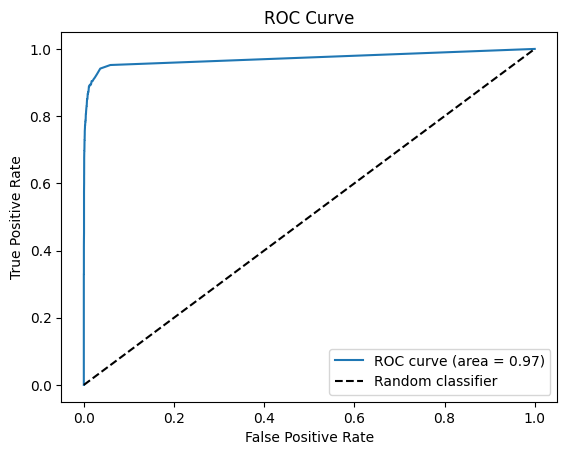

In [42]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
# roc curve for tpr = fpr  
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()

In [44]:
# Get feature importances
feature_importance = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top features
print(feature_importance_df.head())

       Feature  Importance
24    Rot50CDR    0.135851
20          Ry    0.114968
12      W (km)    0.068232
3    Rrup (km)    0.061379
2     Rjb (km)    0.060138


In [66]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Version of Tensorflow: ", tf.__version__)

Num GPUs Available:  0
Version of Tensorflow:  2.16.1


In [61]:
# Define a function to create your MLP model
def create_model(optimizer='adam', hidden_layer_sizes=(100,), learning_rate=0.001):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_layer_sizes[0], activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


# Wrap your Keras model using KerasClassifier
keras_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', keras_model)
])

# Define the parameter space
parameter_space = {
    'mlp__optimizer': ['sgd', 'adam'],
    'mlp__learning_rate': [0.001, 0.01],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__hidden_layer_sizes': [(50,), (100,)]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, parameter_space, n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train)

ValueError: Invalid parameter activation for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(activation=tanh)`
Check the list of available parameters with `estimator.get_params().keys()`

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cd42330f-db8e-4ceb-ade1-2d5f297f211b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>